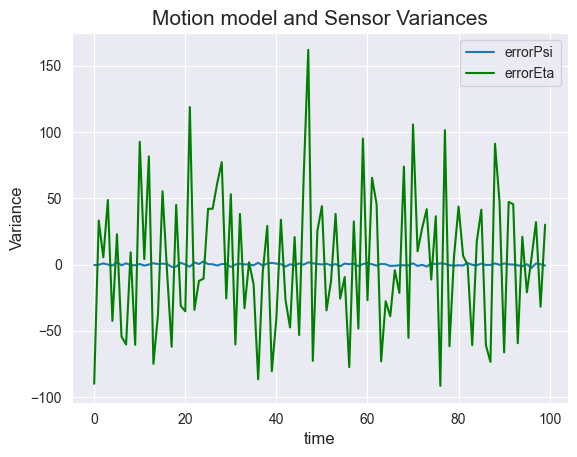

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 100  # number of samples
time = np.arange(0, N, 1)
muPsi, sigmaPsi = 0, 1     # mean and standard deviation that describe the motion model error
muEta, sigmaEta = 0, 50     # mean and standard deviation that describe the sensor error
errorPsi = np.random.normal(muPsi, sigmaPsi, 100)   # pdf of the motion model error
errorEta = np.random.normal(muEta, sigmaEta, 100)   # pdf of the sensor error

plt.title('Motion model and Sensor Variances',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('Variance',fontsize=12)
plt.plot(time, errorPsi, label='errorPsi')
plt.plot(time, errorEta, 'g', label='errorEta')
plt.legend()

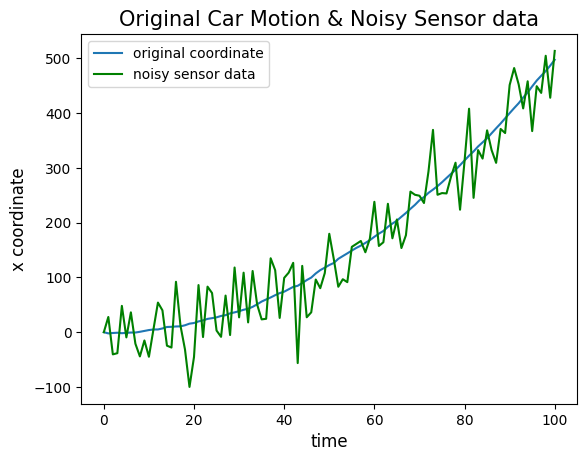

In [14]:
# Creation of the toycar's GPS data

a = 0.1  # acceleration
x = np.zeros(N+1)
z = np.zeros(N+1)

time = np.arange(0, N+1, 1)

for t in range(0, N):
    x[t+1] = x[t] + a * t + np.random.normal(muPsi, sigmaPsi, 1)
    z[t+1] = x[t+1] + np.random.normal(muEta, sigmaEta, 1)

plt.title('Original Car Motion & Noisy Sensor data',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)
plt.plot(time, x, label='original coordinate')
plt.plot(time, z, 'g', label='noisy sensor data')
plt.legend()

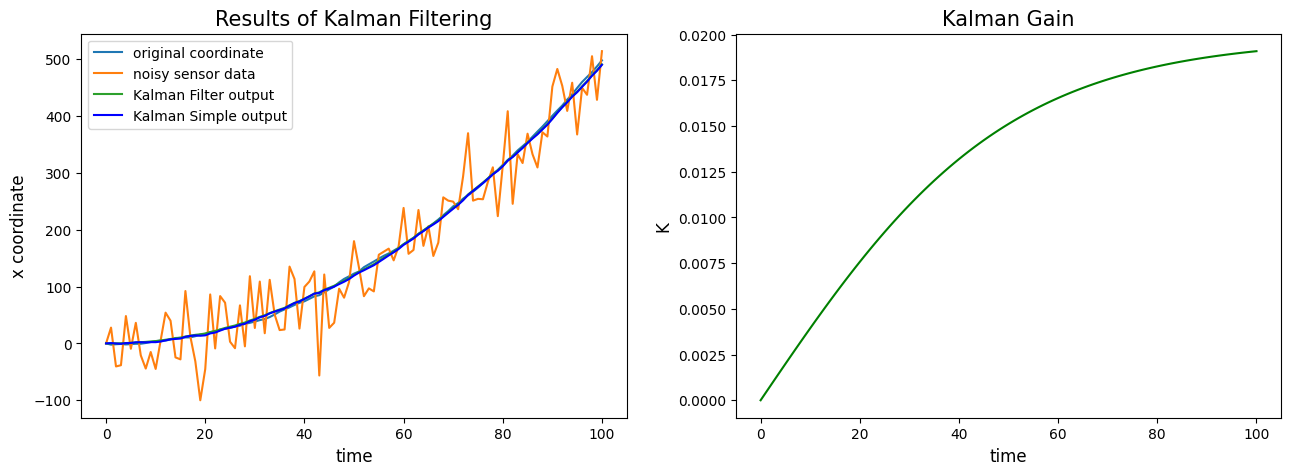

In [15]:
# Linear Kalman Filter

eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)
xSimple = np.zeros(N+1)
# homework
K_stab = 0.02

for t in range(0, N):
    eOpt[t+1] = np.sqrt((sigmaEta**2) * (eOpt[t]**2 + sigmaPsi**2)/(sigmaEta**2 + eOpt[t]**2 + sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(sigmaEta**2)
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]
    # дз
    xSimple[t+1] = (xSimple[t]+a*t) * (1-K_stab) + K_stab * z[t+1]

plt.subplot(1,2,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Results of Kalman Filtering',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)
plt.plot(time, x, label='original coordinate')
plt.plot(time, z, label='noisy sensor data')
plt.plot(time, xOpt, label='Kalman Filter output')
# дз
plt.plot(time, xSimple, 'b', label='Kalman Simple output')
plt.legend()

plt.subplot(1,2,2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Kalman Gain',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('K',fontsize=12)
plt.plot(time, K, 'g', label='Kalman Gain')
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)

In [16]:
# Home work 2: Create simplified recursive filter and compare its results with 1D Kalman filter
# the solutions are in the sections marked with comments in Note 4
# how to get K_stab?
# способ 1: we can see that the limit of the K distribution tends towards 0.02 as t -> inf
K_stab = 0.02

# способ 2:
# calculating limit of K

from sympy import *
# calculate the limit of the K numpy array
K_stab = limit(K, time, oo)
print(K[-1])
print(K_stab[-1])


# способ 3
# from scipy import *
# import math
# def func(x, a, b):
#     return a * np.sqrt(x) + b
# coeff, cov = optimize.curve_fit(func,time, K)
# print(coeff)
# plt.plot(time, coeff[0]*np.sqrt(time)+coeff[1])
# plt.show()
# x, y, z = symbols('x y z')
# expr = limit(coeff[0] * x ** (1/2) + coeff[1], x, oo)
# print(expr)


0.01909546465607719
0.0190954646560772
